<a href="https://colab.research.google.com/github/Pranov1984/Flower-Classification-TransferLeaning/blob/main/Transfer_Learning_casestudy_flowers_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Case Study: Flowers CNN Classifier</h1>
Flowers dataset (https://www.kaggle.com/alxmamaev/flowers-recognition) 

*Make sure you activate Hardware accelerator in the settings. 
Go to Runtime --> Change runtime type --> Set Hardware Accelerator to GPU*

In [1]:
%tensorflow_version 2.x

**Mounting Google Drive on to the Google Colab instance**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New section

**Set the appropriate path for the datsaet zip provided**

In [2]:
images_path = "/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Module 9 - Computer Vision/Week 1 - CV  - Mentor deck/Copy of flowers.zip"

**Extracting the dataset.zip to the present working directory**

In [3]:
from zipfile import ZipFile
with ZipFile(images_path,'r') as zip:
  zip.extractall()

*Check the list of files in the pwd(present working directory) by running command 'ls' and ensure 'dataset' folder has been generated*

In [4]:
!ls

drive  flowers	sample_data


What are the folder names which constitute the data (flowers) for training

In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [6]:
os.listdir('./flowers')

['train', 'test']

In [7]:
PATH = ('./flowers/')
PATH

'./flowers/'

## How many folders are present in train and test 

In [8]:
len(os.listdir('./flowers/train')) , len(os.listdir('./flowers/test'))

(5, 5)

What are the folder names which constitute the train and test folders

In [9]:
print("Training Sub Folder Names are:")
os.listdir('./flowers/train')

Training Sub Folder Names are:


['daisy', 'sunflower', 'dandelion', 'rose', 'tulip']

In [10]:
print("Test Sub Folder Names are:")
os.listdir('./flowers/test')

Test Sub Folder Names are:


['daisy', 'sunflower', 'dandelion', 'rose', 'tulip']

How many images are present within each sub folder in train and test folders 

In [11]:
len(os.listdir('./flowers/train/dandelion'))

952

In [12]:
os.listdir('./flowers/train')[0]

'daisy'

In [13]:
# Define data path for the train, test folder
train_path = os.path.join(PATH,'train')
test_path = os.path.join(PATH, 'test')

In [14]:
train_path

'./flowers/train'

In [15]:
print("Training Sub Folder Names are:")
os.listdir(train_path)

Training Sub Folder Names are:


['daisy', 'sunflower', 'dandelion', 'rose', 'tulip']

In [16]:
# Define the directory paths for the train, test

train_dir = os.listdir(train_path)
test_dir = os.listdir(test_path)

### Number of flower imagers in each Train Subfolder

In [17]:
for f in train_dir:
    print("Total training  images of flower type {fname} is: {count}"
          .format(fname = f, count = len(os.listdir(train_path+'/'+f))))

Total training  images of flower type daisy is: 669
Total training  images of flower type sunflower is: 634
Total training  images of flower type dandelion is: 952
Total training  images of flower type rose is: 684
Total training  images of flower type tulip is: 884


### Number of flower imagers in each Test Subfolder

In [18]:
for f in test_dir:
    print("Total test  images of flower type {fname} is: {count}"
          .format(fname = f, count = len(os.listdir(test_path+'/'+f))))

Total test  images of flower type daisy is: 100
Total test  images of flower type sunflower is: 100
Total test  images of flower type dandelion is: 100
Total test  images of flower type rose is: 100
Total test  images of flower type tulip is: 100


### Number of classes of flowers to be used for Classification

In [19]:
print("Total no. of breeds of flowers being considered for classification: ", len(train_dir))

Total no. of breeds of flowers being considered for classification:  5


## Print some of the image names in each of the train and test folders


In [20]:
for f in train_dir:
    print("Five train  image names of flower type {fname} is: {img_name} "
          .format(fname = f, img_name = os.listdir(train_path+'/'+f)[0:5]))

Five train  image names of flower type daisy is: ['10437770546_8bb6f7bdd3_m.jpg', '5765646947_82e95a9cc9_n.jpg', '34283646340_4fe48d1bb7_n.jpg', '3098641292_76c908ba1f_n.jpg', '2812442552_3eed5fb9f2_m.jpg'] 
Five train  image names of flower type sunflower is: ['3568114325_d6b1363497.jpg', '15054864058_2edca122a9_n.jpg', '4932736308_827012cff2.jpg', '2767658405_1e2043f44c_n.jpg', '2883115621_4837267ea1_m.jpg'] 
Five train  image names of flower type dandelion is: ['10777398353_5a20bb218c.jpg', '33882910234_dd8f1479e3_n.jpg', '33886931523_4499a65b72_n.jpg', '4716316039_044e4d2d1a.jpg', '2553703483_558d12668c_n.jpg'] 
Five train  image names of flower type rose is: ['159079265_d77a9ac920_n.jpg', '5001848317_b33d17ab7a_n.jpg', '4575042086_7674b76297_n.jpg', '3072908271_08764c732a_m.jpg', '8063462557_e0a8bd6c64_n.jpg'] 
Five train  image names of flower type tulip is: ['17113203493_735185295f_n.jpg', '14127532150_112823a8f6.jpg', '3558517884_0c7ca8b862_m.jpg', '65347450_53658c63bd_n.jpg', 

In [21]:
train_path, train_dir

('./flowers/train', ['daisy', 'sunflower', 'dandelion', 'rose', 'tulip'])

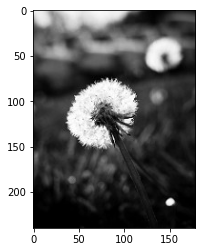

In [22]:
from skimage import data, io
import matplotlib.pyplot as plt


img = io.imread(os.path.join('./flowers/train/dandelion/6901435398_b3192ff7f8_m.jpg'))
plt.imshow(img)
plt.show()

In [23]:
img.shape

(240, 179, 3)

In [24]:
for f in test_dir:
    print("Five test  image names of flower type {fname} is: {img_name} "
          .format(fname = f, img_name = os.listdir(test_path+'/'+f)[0:5]))

Five test  image names of flower type daisy is: ['174131220_c853df1287.jpg', '520752848_4b87fb91a4.jpg', '2045022175_ad087f5f60_n.jpg', '488202750_c420cbce61.jpg', '1396526833_fb867165be_n.jpg'] 
Five test  image names of flower type sunflower is: ['1314584013_fe935fdeb1_n.jpg', '184682320_73ccf74710.jpg', '1022552002_2b93faf9e7_n.jpg', '877083343_e3338c4125.jpg', '2425164088_4a5d2cdf21_n.jpg'] 
Five test  image names of flower type dandelion is: ['515143813_b3afb08bf9.jpg', '98992760_53ed1d26a9.jpg', '145173479_7d04346c20.jpg', '11545123_50a340b473_m.jpg', '479115838_0771a6cdff.jpg'] 
Five test  image names of flower type rose is: ['17291451621_0e39f08b9e_n.jpg', '17158274118_00ec99a23c.jpg', '18464055536_709c8af0b7_n.jpg', '18302780950_9469703544_n.jpg', '33568244695_7ec846bcc6_n.jpg'] 
Five test  image names of flower type tulip is: ['21091481475_884cd885c8_n.jpg', '19868509504_b2fc173274_n.jpg', '20896271018_9f1dc41c93_n.jpg', '25429501953_a1f9ce09e6_n.jpg', '20733335929_0100f38c4a

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 10x4 configuration
nrows = 5
ncols = 4

# Index for iterating over images
pic_index = 0

In [26]:
os.listdir(train_path)

['daisy', 'sunflower', 'dandelion', 'rose', 'tulip']

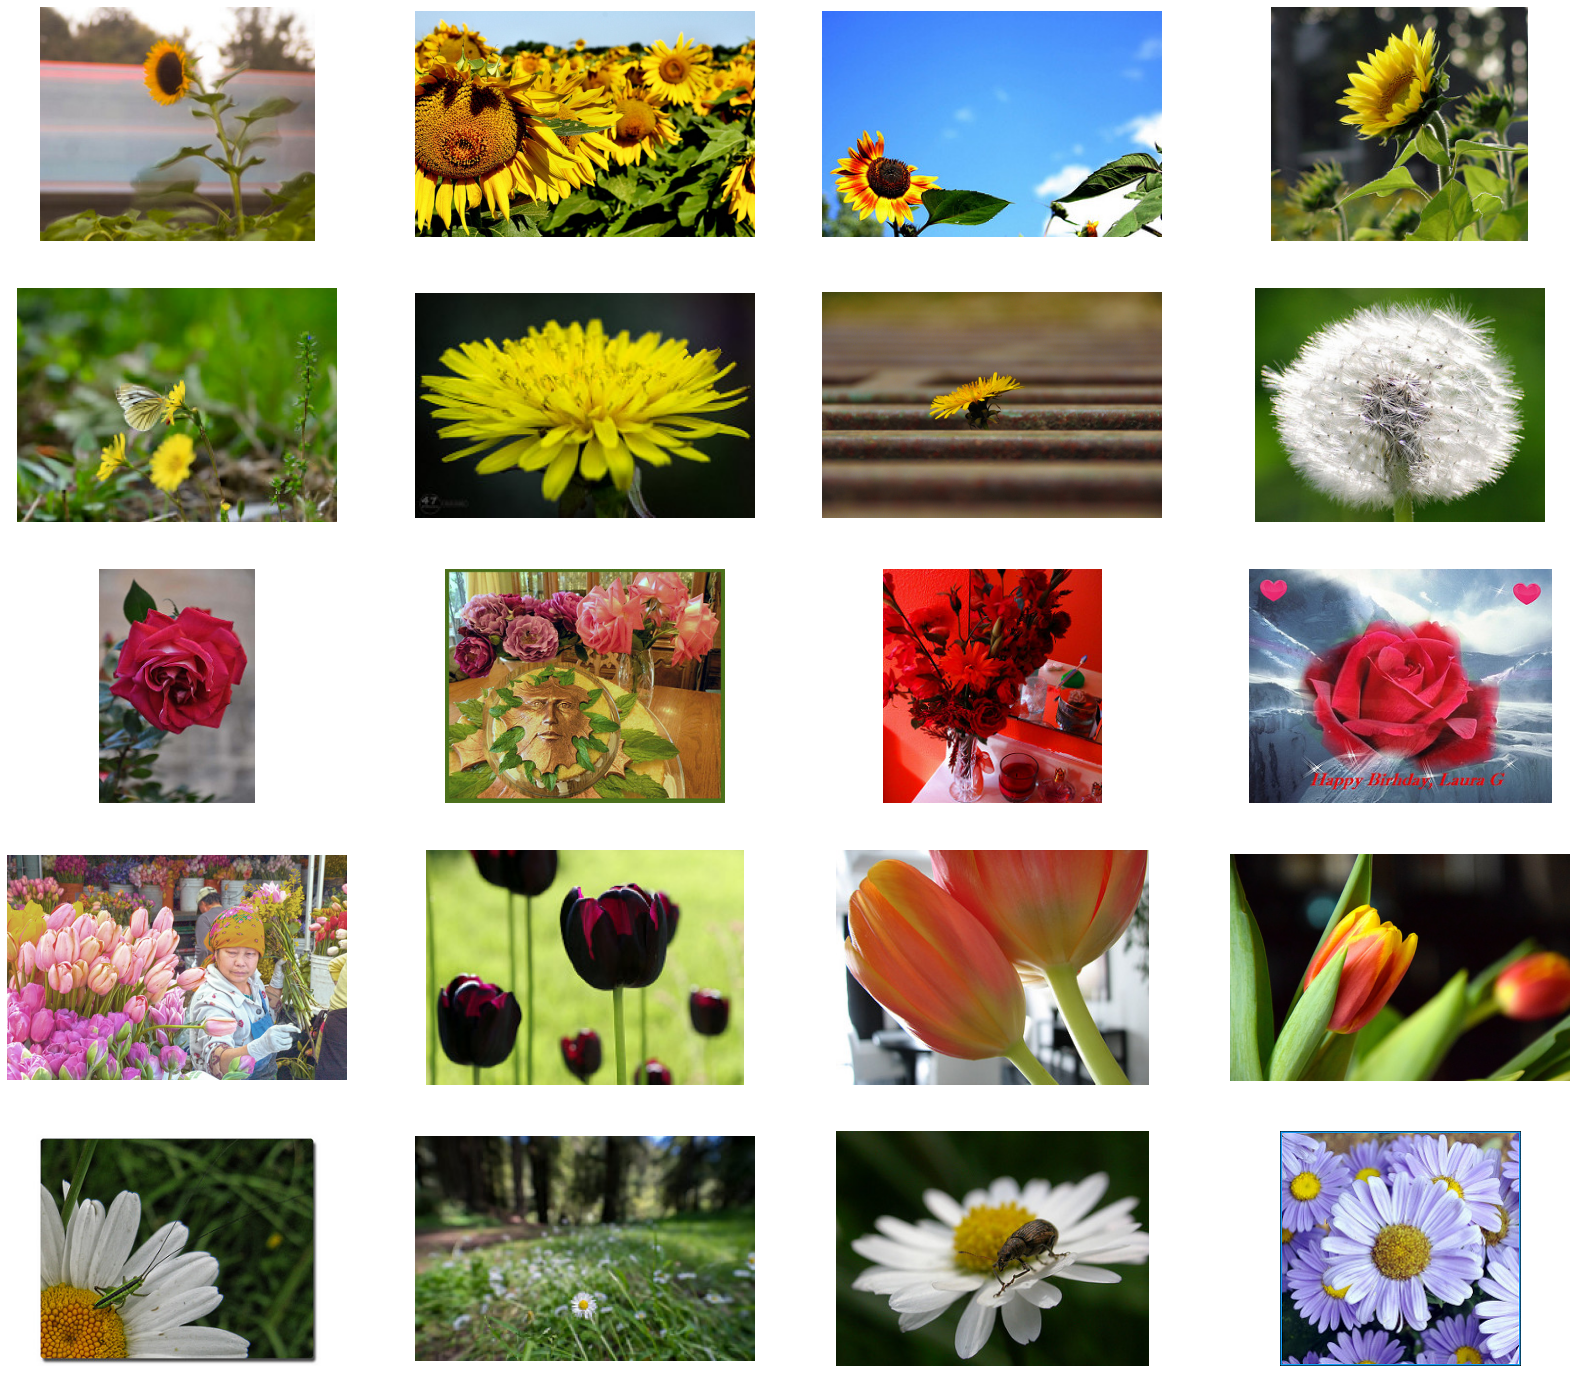

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 7, nrows * 5)

pic_index += 5
next_dandelion_pix = [os.path.join(train_path+'/sunflower', fname) 
                for fname in os.listdir(train_path+'/sunflower')[pic_index-4:pic_index]]
next_rose_pix = [os.path.join(train_path+'/dandelion', fname) 
                for fname in os.listdir(train_path+'/dandelion')[pic_index-4:pic_index]]
next_sunflower_pix = [os.path.join(train_path+'/rose', fname) 
                for fname in os.listdir(train_path+'/rose')[pic_index-4:pic_index]]
next_daisy_pix = [os.path.join(train_path+'/tulip', fname) 
                for fname in os.listdir(train_path+'/tulip')[pic_index-4:pic_index]]
next_tulip_pix = [os.path.join(train_path+'/daisy', fname) 
                for fname in os.listdir(train_path+'/daisy')[pic_index-4:pic_index]]

for i, img_path in enumerate(next_dandelion_pix+next_rose_pix+next_sunflower_pix+next_daisy_pix+next_tulip_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Importing required Keras modules**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

<h2>Building the CNN Classifier</h2>

In [ ]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 5 neuron to predict the categorical classifcation
classifier.add(Dense(units = 5, activation = 'softmax'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

**Compiling the CNN classifier with Adam optimizer (default Learning rate and other parameters)
and Categorical Crossentropy as loss function and Accuracy as the metric to monitor**

*Optionally you can use an optimizer with custom learning rate and passing it to the optimizer parameter of compile*

*Eg: keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)*

In [ ]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Dataset Pre-processing**

*ImageDataGenerator is a powerful preprocessing utility to generate training and 
testing data with common data augmentation techniques. It can also be used to  
generate training data from Images stored in hierarchical directory structures
For more options of ImageDataGenerator go to https://keras.io/preprocessing/image/*

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Create data generator for training data with data augmentation and normalizing all
# values by 255
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

# Setting training data generator's source directory
# Setting the target size to resize all the images to (64,64) as the model input layer expects 64X64 images

training_set = train_datagen.flow_from_directory('./flowers/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Setting testing data generator's source directory
test_set = test_datagen.flow_from_directory('./flowers/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


# There are 3823 training images and 500 test images in total
classifier.fit_generator(training_set,
                         steps_per_epoch = int(3823/32),
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = int(500/32))

Found 3823 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Epoch 1/20
119/119 [==============================] - 47s 140ms/step - loss: 1.3482 - accuracy: 0.4123 - val_loss: 1.1640 - val_accuracy: 0.4938
Epoch 2/20
119/119 [==============================] - 16s 135ms/step - loss: 1.0839 - accuracy: 0.5634 - val_loss: 1.1352 - val_accuracy: 0.5458
Epoch 3/20
119/119 [==============================] - 16s 134ms/step - loss: 0.9972 - accuracy: 0.6122 - val_loss: 1.0478 - val_accuracy: 0.5854
Epoch 4/20
119/119 [==============================] - 16s 134ms/step - loss: 0.9299 - accuracy: 0.6349 - val_loss: 1.0620 - val_accuracy: 0.5646
Epoch 5/20
119/119 [==============================] - 16s 134ms/step - loss: 0.8697 - accuracy: 0.6629 - val_loss: 1.0639 - val_accuracy: 0.5646
Epoch 6/20
119/119 [==============================] - 16s 134ms/step - loss: 0.8171 - accuracy: 0.6935 - val_loss: 0.9214 - val_accuracy: 0.6146
Epoch 7/20
119/119 [===========================

**Always save the model and its weights after training**

In [ ]:
classifier.save('./classifier.h5')

classifier.save_weights('./classifier_weights.h5')

*Check the current directory if the weights have been saved*

In [ ]:
!ls

classifier.h5  classifier_weights.h5  drive  flowers  sample_data


<h2>Let's test the model now</h2>

**Load the pre-trained saved model**

In [ ]:

from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the pre trained model from the HDF5 file saved previously
pretrained_model = load_model('./classifier.h5')
pretrained_model.load_weights('./classifier_weights.h5')

**Testing the model on a test image from one of the test folders**

In [ ]:
import cv2
test_image = cv2.imread('./flowers/test/daisy/100080576_f52e8ee070_n.jpg')
# Resize the image to 64X64 shape to be compatible with the model
test_image = cv2.resize(test_image,(64,64))

# Check if the size of the Image array is compatible with Keras model
print(test_image.shape)

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255.0

#Check the size of the Image array again
print('After expand_dims: '+ str(test_image.shape))


#Predict the result of the test image
result = classifier.predict(test_image)

# Check the indices Image Data Generator has allotted to each folder
classes_dict = training_set.class_indices
print(classes_dict)

# Creating a list of classes in test set for showing the result as the folder name
prediction_class = []
for class_name,index in classes_dict.items():
  prediction_class.append(class_name)
  
print(result[0])

# Index of the class with maximum probability
predicted_index = np.argmax(result[0])

# Print the name of the class
print(prediction_class[predicted_index])

(64, 64, 3)
After expand_dims: (1, 64, 64, 3)
{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
[0.18397437 0.10323846 0.17825729 0.01330501 0.52122486]
tulip


**Generating a report on the test data**

In [ ]:
# Re-initalizing the test data generator with shuffle=False to create the confusion matrix
test_set = test_datagen.flow_from_directory('./flowers/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            shuffle=False,
                                            class_mode = 'categorical')

# Predict the whole generator to get predictions
Y_pred = classifier.predict_generator(test_set, int(500/32+1))

# Find out the predictions classes with maximum probability
y_pred = np.argmax(Y_pred, axis=1)

# Utilities for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Printing the confusion matrix based on the actual data vs predicted data. 
print(confusion_matrix(test_set.classes, y_pred))

# Printing the classification report
print(classification_report(test_set.classes, y_pred, target_names=prediction_class))

Found 500 images belonging to 5 classes.
[[76  8 14  2  0]
 [22 48  6 22  2]
 [15  1 56  4 24]
 [ 3  3  2 91  1]
 [ 3  0 45  8 44]]
              precision    recall  f1-score   support

       daisy       0.64      0.76      0.69       100
   dandelion       0.80      0.48      0.60       100
        rose       0.46      0.56      0.50       100
   sunflower       0.72      0.91      0.80       100
       tulip       0.62      0.44      0.51       100

    accuracy                           0.63       500
   macro avg       0.65      0.63      0.62       500
weighted avg       0.65      0.63      0.62       500



**We can play around with the model by adding regularization to the layers, adding more convolutional layers, etc., to improve the testing accuracy**

### Let's attempt Transfer Learning

In [27]:
import numpy as np
import os

import time
import tensorflow as tf

from keras.applications import resnet
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image

from keras.applications.imagenet_utils import preprocess_input    ### this helps in converting our images to the dimensions of classifiers used to train imagenet images
from keras.applications.imagenet_utils import decode_predictions  ### this helps in decode predictions to human readable class
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from keras import optimizers

In [28]:
model = VGG16()
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Use the model above to classify any image from the data

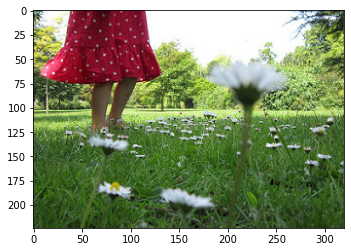

(224, 320, 3)

In [29]:
img = io.imread(os.path.join(train_path+'/'+'daisy'+'/'+'10391248763_1d16681106_n.jpg'))
plt.imshow(img)
plt.show()
img.shape

# Preprocess the image dimension to the shape/dimension of input shape for vgg16 or resnet or any model that was used on image net data.

We need to do this since we will use those models for our custom classification

In [30]:
img = image.load_img(os.path.join(train_path+'/'+'daisy'+'/'+'10391248763_1d16681106_n.jpg'), target_size=(224,224))
x = image.img_to_array(img)

In [31]:
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)

x=preprocess_input(x)
x.shape

(224, 224, 3)
(1, 224, 224, 3)


(1, 224, 224, 3)

In [32]:
print(x)

[[[[136.061      138.22101    116.32      ]
   [ 16.060997    28.221       -6.6800003 ]
   [-42.939003     5.2210007  -29.68      ]
   ...
   [-41.939003   -26.779      -46.68      ]
   [-61.939003   -36.779      -55.68      ]
   [-42.939003     1.2210007  -20.68      ]]

  [[ 15.060997    15.221001    -5.6800003 ]
   [  3.060997     4.2210007  -38.68      ]
   [-20.939003    -4.7789993  -27.68      ]
   ...
   [-60.939003     4.2210007  -25.68      ]
   [-32.939003    -0.7789993  -23.68      ]
   [-62.939003   -58.779      -74.68      ]]

  [[ 66.061       46.221       22.32      ]
   [ 64.061       87.221       38.32      ]
   [ -7.939003    10.221001   -17.68      ]
   ...
   [ 51.060997    38.221       19.32      ]
   [ 31.060997     0.22100067 -13.68      ]
   [-59.939003   -38.779      -56.68      ]]

  ...

  [[-78.939      -51.779      -86.68      ]
   [-79.939      -56.779      -80.68      ]
   [-40.939003   -16.779      -55.68      ]
   ...
   [-72.939      -44.779      -82.6

In [ ]:
features = model.predict(x)
print("Predicted Class is" , decode_predictions(features, 2))

Predicted Class is [[('n07734744', 'mushroom', 0.15486896), ('n03534580', 'hoopskirt', 0.14451256)]]


# The top 2 predictions are related to a plant (mushroom) and a girl cloth (skirt)

Exact classification expected is difficult with the pretrained model without adjusting the architecture for the current use case


## Download Resnet model (below)
### Include top means it downloads all layers and weights including the last dense layer i.e. classification layer.

### If we say include_top = False, we will not download the last year or the classification layer 

In [ ]:
model2 = resnet.ResNet50(include_top=True)
model2.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [ ]:
features = model2.predict(x)
print("Predicted Class is" , decode_predictions(features, 2))

Predicted Class is [[('n11939491', 'daisy', 0.80483884), ('n03134739', 'croquet_ball', 0.07906569)]]


## Resnet is giving accurate prediction with no adjustment done. The top prediction is accurate i.e. daisy

## Prepare for converting the images to arrays for pushing into models for training

In [36]:
PATH
PATH_dir = os.listdir(PATH)
print(PATH_dir , PATH)

['train', 'test'] ./flowers/


In [37]:
train_dir, train_path

(['daisy', 'sunflower', 'dandelion', 'rose', 'tulip'], './flowers/train')

In [38]:
train_path = './flowers/train/'

In [ ]:
img_data_list = []

for dataset in os.listdir(train_path):
  img_list = os.listdir(train_path + "/" + dataset)
  for img in img_list:
    img_path = train_path + dataset+'/'+img
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x= preprocess_input(x)
    img_data_list.append(x)
    

img_data = np.array(img_data_list)

In [ ]:
print(img_data.shape)

(3823, 1, 224, 224, 3)


## Save the features for future use as features directly for training/prediction

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Module 9 - Computer Vision/Week 1 - CV  - Mentor deck/train_data.npy', img_data)


## Load the saved the training data and labels

In [31]:
img_data = np.load('/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Module 9 - Computer Vision/Week 1 - CV  - Mentor deck/train_data.npy')

#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(3823, 1, 224, 224, 3)
(1, 3823, 224, 224, 3)
(3823, 224, 224, 3)


In [39]:
for f in train_dir:
    print("Total training  images of flower type {fname} is: {count}"
          .format(fname = f, count = len(os.listdir(train_path+f))))

Total training  images of flower type daisy is: 669
Total training  images of flower type sunflower is: 634
Total training  images of flower type dandelion is: 952
Total training  images of flower type rose is: 684
Total training  images of flower type tulip is: 884


In [40]:
train_dir , train_path

(['daisy', 'sunflower', 'dandelion', 'rose', 'tulip'], './flowers/train/')

In [41]:
print(len(np.arange(669,1303)))
669+634+952+684+884

634


3823

In [42]:
labels = np.ones(img_data.shape[0],dtype='int64')

# Define the number of classes
num_classes = 5
num_of_samples = img_data.shape[0]

labels[0:669] = 0
labels[669:1303] = 1
labels[1303:2255] = 2
labels[2255:2939] = 3
labels[2939:3823] = 4

names = ['daisy' ,'sunflower', 'dandelion','rose','tulip']

In [43]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)  

## Transfer Learning using the resnet model already imported

### No fine-tuning

In [37]:
from keras.models import Input
image_input = Input(shape=(224,224,3))

In [42]:
model2 = resnet.ResNet50(input_tensor=image_input, include_top=True, weights='imagenet')

last_layer = model2.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output_layer')(x)

102981632/102967424 [==============================] - 1s 0us/step


In [43]:
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [44]:
for layer in custom_resnet_model.layers[:-1]:
	layer.trainable = False

In [45]:
custom_resnet_model.layers[-1].trainable

True

In [46]:
custom_resnet_model.layers[-2].trainable

False

In [47]:
custom_resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
t=time.time()
hist = custom_resnet_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))

Epoch 1/12
96/96 [==============================] - 61s 292ms/step - loss: 0.7697 - accuracy: 0.6991 - val_loss: 0.5454 - val_accuracy: 0.7739
Epoch 2/12
96/96 [==============================] - 25s 256ms/step - loss: 0.4434 - accuracy: 0.8120 - val_loss: 0.5233 - val_accuracy: 0.7791
Epoch 3/12
96/96 [==============================] - 25s 258ms/step - loss: 0.3648 - accuracy: 0.8470 - val_loss: 0.5013 - val_accuracy: 0.7948
Epoch 4/12
96/96 [==============================] - 25s 258ms/step - loss: 0.3111 - accuracy: 0.8797 - val_loss: 0.4670 - val_accuracy: 0.7895
Epoch 5/12
96/96 [==============================] - 25s 257ms/step - loss: 0.2764 - accuracy: 0.8905 - val_loss: 0.4734 - val_accuracy: 0.8105
Epoch 6/12
96/96 [==============================] - 25s 257ms/step - loss: 0.2640 - accuracy: 0.8990 - val_loss: 0.4836 - val_accuracy: 0.7922
Epoch 7/12
96/96 [==============================] - 25s 257ms/step - loss: 0.2213 - accuracy: 0.9212 - val_loss: 0.5023 - val_accuracy: 0.7935

## Much Improved Accuracy is achieved with a jump of about 20% from the classifier built from scratch

In [49]:
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

77/77 [==============================] - 8s 94ms/step - loss: 0.5033 - accuracy: 0.8170


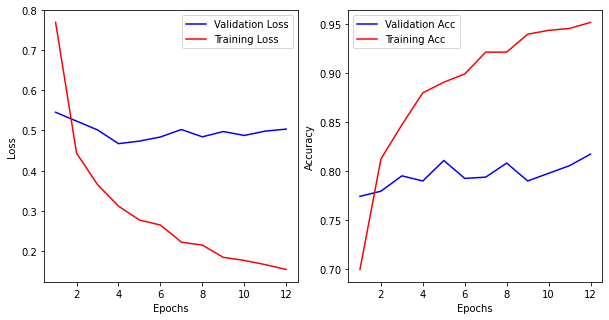

In [50]:
model_val_loss = hist.history['val_loss']
model_train_loss = hist.history['loss']
model_val_acc = hist.history['val_accuracy']
model_train_acc = hist.history['accuracy']

epochs = range(1,13)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, model_val_loss, 'b', label='Validation Loss')
plt.plot(epochs, model_train_loss, 'r', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_val_acc, 'b', label='Validation Acc')
plt.plot(epochs, model_train_acc, 'r', label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Try another version, i.e add a few intermediary dense layers and fine tune it. In the previous iteration we just added our last layer i.e. the classifier layer and trained the model


In [38]:
# Fine tune the resnet 50
#image_input = Input(shape=(224, 224, 3))
model = resnet.ResNet50(weights='imagenet',include_top=False)
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [39]:
last_layer = model.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)
# a softmax layer for 5 classes
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

In [40]:
# this is the model we will train
custom_resnet_model2 = Model(inputs=model.input, outputs=out)

custom_resnet_model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

## Set the Resnet layers as false for training. Only the 6 layers we added are to be finetuned and/or trained

In [41]:
for layer in custom_resnet_model2.layers[:-6]:
	layer.trainable = False

custom_resnet_model2.layers[-6].trainable

True

In [42]:
custom_resnet_model2.layers[-6].trainable, custom_resnet_model2.layers[-7].trainable

(True, False)

In [47]:
#from tensorflow.keras import optimizers

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
custom_resnet_model2.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))

Epoch 1/12
96/96 [==============================] - 61s 295ms/step - loss: 1.0247 - accuracy: 0.6396 - val_loss: 0.5174 - val_accuracy: 0.7895
Epoch 2/12
96/96 [==============================] - 25s 259ms/step - loss: 0.6107 - accuracy: 0.7521 - val_loss: 0.4402 - val_accuracy: 0.8157
Epoch 3/12
96/96 [==============================] - 25s 258ms/step - loss: 0.5068 - accuracy: 0.7937 - val_loss: 0.4403 - val_accuracy: 0.7987
Epoch 4/12
96/96 [==============================] - 25s 258ms/step - loss: 0.4312 - accuracy: 0.8152 - val_loss: 0.4041 - val_accuracy: 0.8366
Epoch 5/12
96/96 [==============================] - 25s 258ms/step - loss: 0.3988 - accuracy: 0.8293 - val_loss: 0.4098 - val_accuracy: 0.8353
Epoch 6/12
96/96 [==============================] - 25s 258ms/step - loss: 0.3372 - accuracy: 0.8522 - val_loss: 0.4326 - val_accuracy: 0.8261
Epoch 7/12
96/96 [==============================] - 25s 257ms/step - loss: 0.3334 - accuracy: 0.8604 - val_loss: 0.4216 - val_accuracy: 0.8196

### Slightly better level of accuracy as the previous iteration. Used a lower learning rate which improved the ccuracy by a percentage than without it.

## This turned out to be the best performance across all iterations performed in this notebook

## Vizualizing Test Predictions

In [57]:
os.listdir(test_path+'/'+'daisy')[0]

'174131220_c853df1287.jpg'

In [58]:
img = image.load_img(os.path.join(test_path+'/'+'daisy'+'/'+'154332674_453cea64f4.jpg'), target_size=(224,224))
x = image.img_to_array(img)

print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [59]:
x=preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [60]:
features = custom_resnet_model2.predict(x)
print( "Actual class is: ",np.argmax(features))

Actual class is:  0


# We 0 is the encoded value for daisy. So this is the correct prediction

In [61]:
os.listdir(test_path+'/'+'rose')[0], os.listdir(test_path+'/'+'rose')[2],

('17291451621_0e39f08b9e_n.jpg', '18464055536_709c8af0b7_n.jpg')

In [62]:
img = image.load_img(os.path.join(test_path+'/'+'rose'+'/'+'21039447185_96d59941b2_n.jpg'), target_size=(224,224))
x = image.img_to_array(img)

print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x=preprocess_input(x)
x.shape

(224, 224, 3)
(1, 224, 224, 3)


(1, 224, 224, 3)

In [63]:
features = custom_resnet_model2.predict(x)
print( "Actual class is: ",np.argmax(features))

Actual class is:  3


# Class 3 is for rose.Correct Predition .Let's visualize the image and validate

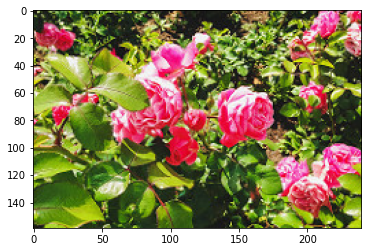

(159, 240, 3)

In [64]:
img = io.imread(os.path.join(test_path+'/'+'rose'+'/'+'21039447185_96d59941b2_n.jpg'))
plt.imshow(img)
plt.show()
img.shape

## Voila!! Correct prediction. This is on a test image that the model has never seen. The rose images the model is seen is that present in training folder.

## Try another version, i.e add another intermediary dense layer and fine tune it.

In [71]:
# Fine tune the resnet 50
#image_input = Input(shape=(224, 224, 3))
model = resnet.ResNet50(weights='imagenet',include_top=False)
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [79]:
last_layer = model.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu',name='fc-3')(x)
x = Dropout(0.5)(x)
# a softmax layer for 5 classes
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

In [80]:
# this is the model we will train
custom_resnet_model3 = Model(inputs=model.input, outputs=out)

custom_resnet_model3.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

## Set the Resnet layers as false for training. Only the 6 layers we added are to be finetuned and/or trained

In [81]:
for layer in custom_resnet_model3.layers[:-6]:
	layer.trainable = False

custom_resnet_model3.layers[-6].trainable

True

In [82]:
custom_resnet_model3.layers[-6].trainable, custom_resnet_model3.layers[-7].trainable

(True, False)

In [83]:
custom_resnet_model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model3.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))

Epoch 1/12
96/96 [==============================] - 30s 271ms/step - loss: 1.6091 - accuracy: 0.3656 - val_loss: 0.8883 - val_accuracy: 0.7673
Epoch 2/12
96/96 [==============================] - 25s 261ms/step - loss: 1.0153 - accuracy: 0.5883 - val_loss: 0.6492 - val_accuracy: 0.7765
Epoch 3/12
96/96 [==============================] - 25s 257ms/step - loss: 0.8800 - accuracy: 0.6436 - val_loss: 0.5943 - val_accuracy: 0.7882
Epoch 4/12
96/96 [==============================] - 25s 257ms/step - loss: 0.8151 - accuracy: 0.6753 - val_loss: 0.5641 - val_accuracy: 0.7843
Epoch 5/12
96/96 [==============================] - 25s 257ms/step - loss: 0.7531 - accuracy: 0.6835 - val_loss: 0.5370 - val_accuracy: 0.8000
Epoch 6/12
96/96 [==============================] - 25s 256ms/step - loss: 0.7084 - accuracy: 0.7139 - val_loss: 0.5288 - val_accuracy: 0.7922
Epoch 7/12
96/96 [==============================] - 25s 257ms/step - loss: 0.6923 - accuracy: 0.7276 - val_loss: 0.5323 - val_accuracy: 0.8013

## Try another version, i.e fine tune a few more layers from custom resnet model 2. In the previous iteration we just finetuned the layers we had added

In [65]:
# Fine tune the resnet 50
#image_input = Input(shape=(224, 224, 3))
model = resnet.ResNet50(weights='imagenet',include_top=False)
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [66]:
last_layer = model.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)
# a softmax layer for 5 classes
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

In [67]:
# this is the model we will train
custom_resnet_model2 = Model(inputs=model.input, outputs=out)

custom_resnet_model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

## Fine tune the last 10 layers

In [68]:
for layer in custom_resnet_model2.layers[:-10]:
	layer.trainable = False

custom_resnet_model2.layers[-10].trainable

True

In [69]:
custom_resnet_model2.layers[-11].trainable, custom_resnet_model2.layers[-10].trainable

(False, True)

In [70]:
custom_resnet_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))

Epoch 1/12
96/96 [==============================] - 32s 277ms/step - loss: 0.9489 - accuracy: 0.6625 - val_loss: 0.4901 - val_accuracy: 0.8092
Epoch 2/12
96/96 [==============================] - 25s 263ms/step - loss: 0.5428 - accuracy: 0.7881 - val_loss: 0.4385 - val_accuracy: 0.8144
Epoch 3/12
96/96 [==============================] - 25s 263ms/step - loss: 0.4258 - accuracy: 0.8179 - val_loss: 0.4845 - val_accuracy: 0.8118
Epoch 4/12
96/96 [==============================] - 25s 263ms/step - loss: 0.3485 - accuracy: 0.8483 - val_loss: 0.5533 - val_accuracy: 0.7895
Epoch 5/12
96/96 [==============================] - 25s 262ms/step - loss: 0.2937 - accuracy: 0.8728 - val_loss: 0.4401 - val_accuracy: 0.8157
Epoch 6/12
96/96 [==============================] - 25s 261ms/step - loss: 0.2552 - accuracy: 0.8947 - val_loss: 0.5148 - val_accuracy: 0.8209
Epoch 7/12
96/96 [==============================] - 25s 261ms/step - loss: 0.2161 - accuracy: 0.9084 - val_loss: 0.5883 - val_accuracy: 0.8078

## Nearly same accuracy. Let use this model to predict a few unseen images

## Vizualizing Test Predictions

In [ ]:
os.listdir(test_path+'/'+'daisy')[0]

'174131220_c853df1287.jpg'

In [ ]:
img = image.load_img(os.path.join(test_path+'/'+'daisy'+'/'+'154332674_453cea64f4.jpg'), target_size=(224,224))
x = image.img_to_array(img)

print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [ ]:
x=preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [ ]:
features = custom_resnet_model2.predict(x)
print( "Actual class is: ",np.argmax(features))

Actual class is:  0


# We 0 is the encoded value for daisy. So this is the correct prediction

In [ ]:
os.listdir(test_path+'/'+'rose')[0], os.listdir(test_path+'/'+'rose')[2],

('17291451621_0e39f08b9e_n.jpg', '18464055536_709c8af0b7_n.jpg')

In [ ]:
img = image.load_img(os.path.join(test_path+'/'+'rose'+'/'+'21039447185_96d59941b2_n.jpg'), target_size=(224,224))
x = image.img_to_array(img)

print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x=preprocess_input(x)
x.shape

(224, 224, 3)
(1, 224, 224, 3)


(1, 224, 224, 3)

In [ ]:
features = custom_resnet_model2.predict(x)
print( "Actual class is: ",np.argmax(features))

Actual class is:  3


# Class 3 is for rose.Correct Predition .Let's visualize the image and validate

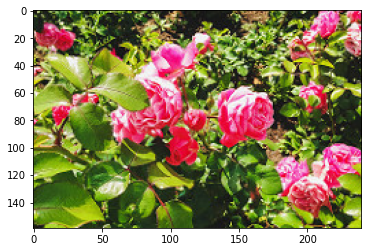

(159, 240, 3)

In [ ]:
img = io.imread(os.path.join(test_path+'/'+'rose'+'/'+'21039447185_96d59941b2_n.jpg'))
plt.imshow(img)
plt.show()
img.shape

## Voila!! Correct prediction. This is on a test image that the model has never seen. The rose images the model is seen is that present in training folder.

### Try VGG and see if a smaller network gives better result

In [34]:
model_VGG = VGG16()
print(model_VGG.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [44]:
last_layer = model_VGG.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)

# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)
# a softmax layer for 5 classes
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

In [45]:
# this is the model we will train
custom_VGG = Model(inputs=model_VGG.input, outputs=out)

custom_VGG.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Set the VGG layers as false for training. Only the 6 layers we added are to be finetuned and/or trained

In [46]:
for layer in custom_VGG.layers[:-6]:
	layer.trainable = False

custom_VGG.layers[-6].trainable

True

In [48]:
custom_VGG.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_VGG.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))

Epoch 1/12
96/96 [==============================] - 81s 450ms/step - loss: 13.4816 - accuracy: 0.5497 - val_loss: 1.8669 - val_accuracy: 0.7281
Epoch 2/12
96/96 [==============================] - 28s 294ms/step - loss: 5.3617 - accuracy: 0.6550 - val_loss: 2.6713 - val_accuracy: 0.6993
Epoch 3/12
96/96 [==============================] - 28s 293ms/step - loss: 3.8085 - accuracy: 0.6982 - val_loss: 1.3381 - val_accuracy: 0.7373
Epoch 4/12
96/96 [==============================] - 28s 293ms/step - loss: 2.9417 - accuracy: 0.7312 - val_loss: 1.5583 - val_accuracy: 0.7503
Epoch 5/12
96/96 [==============================] - 28s 293ms/step - loss: 2.6479 - accuracy: 0.7449 - val_loss: 1.4612 - val_accuracy: 0.7229
Epoch 6/12
96/96 [==============================] - 28s 294ms/step - loss: 2.2507 - accuracy: 0.7626 - val_loss: 1.4830 - val_accuracy: 0.7255
Epoch 7/12
96/96 [==============================] - 28s 293ms/step - loss: 2.0131 - accuracy: 0.7659 - val_loss: 1.2698 - val_accuracy: 0.737

## Save the model and weights of custom_resnet_model2 for future use

In [ ]:
custom_resnet_model2.save('/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Module 9 - Computer Vision/Week 1 - CV  - Mentor deck/Flowers_TransferL.h5')
custom_resnet_model2.save_weights('/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Module 9 - Computer Vision/Week 1 - CV  - Mentor deck/Flowers_TransferL_weights.h5')

## Load the model and the weights

In [ ]:
from tensorflow import keras
model1 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Module 9 - Computer Vision/Week 1 - CV  - Mentor deck/Flowers_TransferL.h5')
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
#The pre-trained weights must exist in the current folder
model1.load_weights('/content/drive/MyDrive/Colab Notebooks/AIML Mentoring Docs/Module 9 - Computer Vision/Week 1 - CV  - Mentor deck/Flowers_TransferL_weights.h5')

In [ ]:
img = image.load_img(os.path.join(test_path+'/'+'rose'+'/'+'26605779860_50872b454a_n.jpg'), target_size=(224,224))
x = image.img_to_array(img)

print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x=preprocess_input(x)
x.shape

(224, 224, 3)
(1, 224, 224, 3)


(1, 224, 224, 3)

In [ ]:
features = custom_resnet_model2.predict(x)
print( "Actual class is: ",np.argmax(features))

Actual class is:  3


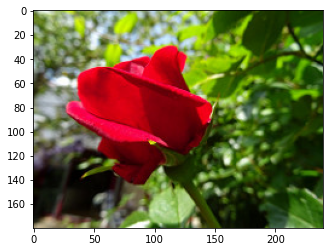

(180, 240, 3)

In [ ]:
img = io.imread(os.path.join(test_path+'/'+'rose'+'/'+'26605779860_50872b454a_n.jpg'))
plt.imshow(img)
plt.show()
img.shape

## This is extra ordinary!!!

In [ ]:
model1.evaluate(X_test, y_test)

24/24 [==============================] - 7s 225ms/step - loss: 0.4020 - accuracy: 0.8928


[0.4020257294178009, 0.8928104639053345]